In [2]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, roc_auc_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("C:/Users/Paras Gahlot/OneDrive/Desktop/Research paper/SocialMediaUsage.csv")

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df = df.drop(columns=["userId", "max_repetitive_punc", "emoji_count_per_action", "punctuations_per_action", "number_of_words_per_action", "avgt2", "avgComments", "creations"])

In [6]:
df=df.drop(columns=["num_of_hashtags_per_action"])

In [7]:
df

,tier,gender,following_rate,followers_avg_age,following_avg_age,avgCompletion,avgTimeSpent,avgDuration,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,age_group
0,2,1,0.000000,0.000,0.00,0.463330,34.160000,53.996091,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,1
1,2,2,0.000000,0.000,0.00,0.429468,15.285714,96.231625,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,2
2,2,1,0.000000,0.000,0.00,0.341657,22.000000,83.051415,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,1
3,2,1,0.000000,0.000,0.00,0.005735,3.000000,523.080000,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,1
4,2,2,0.000000,0.000,0.00,0.456549,12.333333,53.766640,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,2,2,0.000000,0.000,0.00,0.422837,8.714286,56.783167,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,1
488873,1,1,0.017241,0.000,0.00,0.668494,35.662921,69.031216,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,4
488874,1,1,0.229508,1.625,2.25,0.579213,13.444444,50.611380,0.409836,0.000000,0.000000,0.118033,0.000000,0.049180,0.237705,0.303279,4
488875,2,1,0.000000,0.000,0.00,0.221303,9.578947,131.188182,0.113821,0.000000,0.000000,0.030894,0.000000,0.024390,0.130081,0.000000,1


In [11]:
min_val = df['avgCompletion'].min()
max_val = df['avgCompletion'].max()
mean_val = df['avgCompletion'].mean()
std_val = df['avgCompletion'].std()

print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Mean: {mean_val}")
print(f"Standard Deviation: {std_val}")


Min: 0.000653125
Max: 1.0
Mean: 0.3415819579026954
Standard Deviation: 0.19544146737854565


In [12]:
Q1 = df['avgCompletion'].quantile(0.25)
Q2 = df['avgCompletion'].quantile(0.50)  # This is also the median
Q3 = df['avgCompletion'].quantile(0.75)

print(f"Q1: {Q1}")
print(f"Median (Q2): {Q2}")
print(f"Q3: {Q3}")


Q1: 0.199675499
Median (Q2): 0.329742861
Q3: 0.460491742


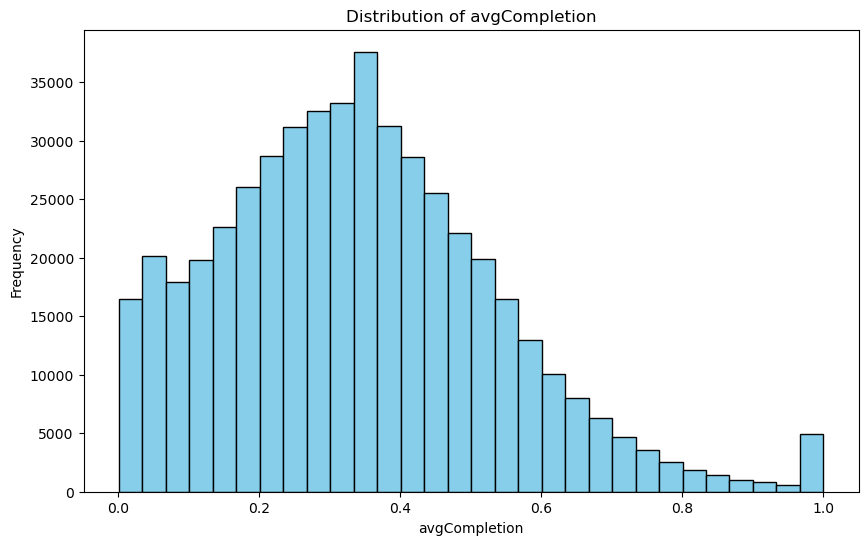

In [10]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'avgCompletion' is your column
plt.figure(figsize=(10, 6))
plt.hist(df['avgCompletion'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of avgCompletion')
plt.xlabel('avgCompletion')
plt.ylabel('Frequency')
plt.show()


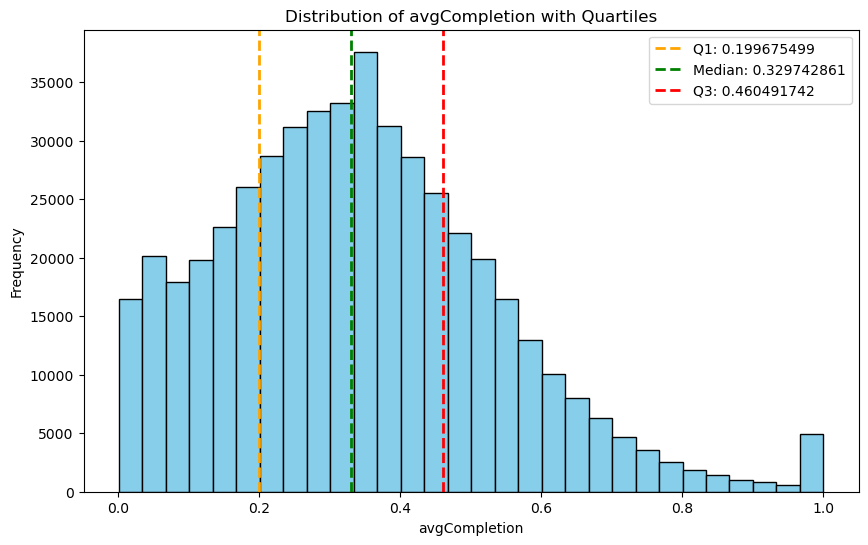

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['avgCompletion'], bins=30, edgecolor='black', color='skyblue')
plt.axvline(Q1, color='orange', linestyle='dashed', linewidth=2, label=f'Q1: {Q1}')
plt.axvline(Q2, color='green', linestyle='dashed', linewidth=2, label=f'Median: {Q2}')
plt.axvline(Q3, color='red', linestyle='dashed', linewidth=2, label=f'Q3: {Q3}')
plt.title('Distribution of avgCompletion with Quartiles')
plt.xlabel('avgCompletion')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [8]:
X = df.drop(columns=['avgCompletion'])  # Features
y = df['avgCompletion']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
features = {'following_rate','followers_avg_age','following_avg_age','content_views','num_of_comments','weekends_trails_watched_per_day','weekdays_trails_watched_per_day','slot1_trails_watched_per_day','slot2_trails_watched_per_day','slot3_trails_watched_per_day','slot4_trails_watched_per_day'}

for col in features:
    min_val = df[col].min()  # Replace 'column_name' with actual feature name
    max_val = df[col].max()
    print(col)
    print("min_val" , min_val)
    print("max_val" , max_val)

    mean_val = df[col].mean()  # Replace 'column_name' with actual feature name
    std_val = df[col].std()

    print("mean_val",  mean_val)
    print("std_val"  ,std_val)
    

following_rate
min_val 0.0
max_val 895.304
mean_val 0.08223307199868475
std_val 2.4677814242707643
following_avg_age
min_val 0.0
max_val 4.0
mean_val 0.4030489152135424
std_val 0.9252910568991644
content_views
min_val 0.000887311
max_val 75.6622807
mean_val 0.39101290312060505
std_val 0.9053034445882919
weekends_trails_watched_per_day
min_val 0.0
max_val 17.20175439
mean_val 0.07435277540255934
std_val 0.2110943318276681
slot2_trails_watched_per_day
min_val 0.0
max_val 27.90598291
mean_val 0.14170522751099773
std_val 0.4026123150194971
weekdays_trails_watched_per_day
min_val 0.0
max_val 18.75614035
mean_val 0.06692721495754762
std_val 0.1747909128231244
slot4_trails_watched_per_day
min_val 0.0
max_val 55.15384615
mean_val 0.15838210569108177
std_val 0.5020652211683725
slot3_trails_watched_per_day
min_val 0.0
max_val 45.08333333
mean_val 0.15040088219049977
std_val 0.45199885022459496
slot1_trails_watched_per_day
min_val 0.0
max_val 19.61290323
mean_val 0.032854689047742074
std_val 0.19

In [ ]:
# tier = Tier of the city in which the user is residing.

# gender = Categorical feature representing the gender of the user. 1 represents male and 2 represents female.

# following_rate =	Number of accounts followed by the user

# followers_avg_age = Average of age groups of all the followers of the user.

# following_avg_age=	Average of age groups of all the accounts followed by the user.

# avgTimeSpent=	Average time spent by the user on a video in seconds.

# avgDuration	=Average duration of the videos that the user has watched till date.

# content_views=	Total number of videos watched.

# num_of_comments=	Total number of comments made by the user 

# weekends_trails_watched_per_day=	Number of videos watched on weekends per day.

# weekdays_trails_watched_per_day	=Number of videos watched on weekdays per day.

# slot1_trails_watched_per_day	=The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot2_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot3_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.
# slot4_trails_watched_per_day=	The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot.


# age_group=	This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups,
# 1: <18y;
# 2: 18-24y;
# 3: 24-30y;
# 4: \>30y




In [61]:
# Define normalization function
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Define normalization parameters for each feature
params = {
    'following_rate': {'min_val': 0.0, 'max_val': 895.304},
    'following_avg_age': {'min_val': 0.0, 'max_val': 4.0},
    'content_views': {'min_val': 0.000887311, 'max_val': 75.6622807},
    'weekends_trails_watched_per_day': {'min_val': 0.0, 'max_val': 17.20175439},
    'slot2_trails_watched_per_day': {'min_val': 0.0, 'max_val': 27.90598291},
    'weekdays_trails_watched_per_day': {'min_val': 0.0, 'max_val': 18.75614035},
    'slot4_trails_watched_per_day': {'min_val': 0.0, 'max_val': 55.15384615},
    'slot3_trails_watched_per_day': {'min_val': 0.0, 'max_val': 45.08333333},
    'slot1_trails_watched_per_day': {'min_val': 0.0, 'max_val': 19.61290323},
    'num_of_comments': {'min_val': 0.0, 'max_val': 8.196850394},
    'followers_avg_age': {'min_val': 0.0, 'max_val': 4.0}
}

def preprocess_input(user_inputs):
    normalized_values = {}
    
    # Normalize features
    for feature, value in user_inputs.items():
        if feature in params:
            params_for_feature = params[feature]
            normalized_value = normalize(value, params_for_feature['min_val'], params_for_feature['max_val'])
            normalized_values[feature] = normalized_value
        else:
            # Directly add features that do not need normalization
            normalized_values[feature] = value
    
    return normalized_values

# Example user inputs (replace with actual input values)
user_inputs = {
    'tier': input("Enter tier: "),
    
    'gender': input("Enter gender: "),
    
    'following_rate': float(input("Enter following_rate: ")),
    
    'followers_avg_age': float(input("Enter followers_avg_age: ")),
    
    'following_avg_age': float(input("Enter following_avg_age: ")),

     'avgTimeSpent': float(input("Enter avgTimeSpent: ")),
    
    'avgDuration': float(input("Enter avgDuration: ")),
    
    'content_views': float(input("Enter content_views: ")),
    
    'num_of_comments': float(input("Enter num_of_comments: ")),

    'weekends_trails_watched_per_day': float(input("Enter weekends_trails_watched_per_day: ")),
    
    'weekdays_trails_watched_per_day': float(input("Enter weekdays_trails_watched_per_day: "))
    
    'slot1_trails_watched_per_day': float(input("Enter slot1_trails_watched_per_day: ")),

    'slot2_trails_watched_per_day': float(input("Enter slot2_trails_watched_per_day: ")),

    'slot3_trails_watched_per_day': float(input("Enter slot3_trails_watched_per_day: ")),

    'slot4_trails_watched_per_day': float(input("Enter slot4_trails_watched_per_day: ")),
    
    'age_group': input("Enter age_group: ")
}

# Preprocess the user inputs
preprocessed_inputs = preprocess_input(user_inputs)

print("Processed values for model input:")
print(preprocessed_inputs)



Enter following_rate:  20
Enter following_avg_age:  2
Enter content_views:  15
Enter weekends_trails_watched_per_day:  20
Enter slot2_trails_watched_per_day:  5
Enter weekdays_trails_watched_per_day:  40
Enter slot4_trails_watched_per_day:  5
Enter slot3_trails_watched_per_day:  5
Enter slot1_trails_watched_per_day:  5
Enter num_of_comments:  10
Enter followers_avg_age:  2
Enter tier:  2
Enter gender:  2
Enter avgTimeSpent:  600
Enter avgDuration:  1200
Enter age_group:  2


Processed values for model input:
{'following_rate': 0.022338781017397443, 'following_avg_age': 0.5, 'content_views': 0.19823997440655963, 'weekends_trails_watched_per_day': 1.1626721057955995, 'slot2_trails_watched_per_day': 0.17917304744740847, 'weekdays_trails_watched_per_day': 2.1326349266734934, 'slot4_trails_watched_per_day': 0.09065550907187277, 'slot3_trails_watched_per_day': 0.11090573013759007, 'slot1_trails_watched_per_day': 0.2549342104718068, 'num_of_comments': 1.2199807876595972, 'followers_avg_age': 0.5, 'tier': '2', 'gender': '2', 'avgTimeSpent': 600.0, 'avgDuration': 1200.0, 'age_group': '2'}


In [64]:
input_features = np.array([list(preprocessed_inputs.values())])
prediction = rf_model.predict(input_features)

print("Predicted attention span:", prediction)


Predicted attention span: [0.5645533]


C:\Users\Paras Gahlot\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
def display_message(avgCompletion):
    if avgCompletion <= 0.199:
        message = "Your predicted attention span is on the lower side. You might benefit from strategies to enhance focus and manage distractions."
    elif avgCompletion <= 0.329:
        message = "Your predicted attention span is slightly below average. Consider small adjustments to improve your concentration."
    elif avgCompletion <= 0.460:
        message = "Your predicted attention span is average. You're managing your focus well, but there's always room for improvement."
    else:
        message = "Your predicted attention span is above average. Keep up the great work in maintaining your focus and engagement!"
    
    return message

print(display_message(prediction))


NameError: name 'prediction' is not defined